In [1]:
import json 
import copy
from datetime import datetime

import pandas as pd
import numpy as np
from scipy import interpolate

In [67]:
import math

import matplotlib as mpl
from matplotlib import cm
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# Some styling 
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')
mpl.rcParams['ps.usedistiller'] = 'xpdf' 
plt.style.use('seaborn-notebook')
plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

# some colors
uiucblue = (19/255,42/255,76/255)
uiucred = (232/255,74/255,39/255)
kitgreen = (50/255,161/255,137/255)

#pd.options.display.max_rows = 999
#pd.options.display.max_columns = None

In [85]:
!pip freeze

absl-py==0.9.0
alabaster==0.7.12
anaconda-client==1.6.3
anaconda-navigator==1.6.4
anaconda-project==0.6.0
appdirs==1.4.3
arff==0.9
asn1crypto==1.3.0
astor==0.8.0
astroid==2.3.3
astropy==2.0.1
attrs==19.3.0
Babel==2.8.0
backcall==0.1.0
backports.shutil-get-terminal-size==1.0.0
backports.weakref==1.0rc1
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.10.1
bleach==3.1.0
blis==0.4.1
bokeh==1.4.0
boto==2.48.0
boto3==1.11.9
botocore==1.14.9
Bottleneck==1.2.1
cachetools==4.0.0
catalogue==1.0.0
certifi==2019.11.28
cffi==1.13.2
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.3.9
conda==4.8.2
conda-package-handling==1.6.0
contextlib2==0.5.5
cryptography==2.8
cycler==0.10.0
cymem==2.0.3
Cython==0.26
cytoolz==0.10.1
dask==2.10.1
datashape==0.5.4
dautil==0.0.1b1
dcor==0.1.5
decorator==4.4.1
defusedxml==0.6.0
distributed==2.10.0
docutils==0.15.2
en-core-web-sm==2.2.5
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.0.2
Flask==1.1.1
Flask-Cors==3.0.8
fsspec==0.6.2
f

In [3]:
# pd.read_json('arxiv-metadata-oai-snapshot.json', lines=True) # leads to memory error

In [5]:
f = open('arxiv-metadata-oai-snapshot.json')

i = 0
ignores = ['abstract', 'authors_parsed', 'versions']  # let's ignore those fields for now
record = f.readline()
results = []

while (record !=  ''): # do this until file is empty
    if (i%100000) == 0:
        print("reached %s at %s"%(i,datetime.now().strftime("%d/%m/%Y %H:%M:%S")))
    res = json.loads(record) 
        
    version = res["versions"][0] # take only the first version
    
    #for version in res["versions"]: # If you want to take into account different versions.
    #newres = copy.deepcopy(res)
    
    res['version'] = version['version']
    res['created'] = version['created']
    
    for ignore in ignores: # save space
        del res[ignore]
    #data.loc[i] = res # avoid DataFrame.append(), this is too slow
    results.append(res)
    
    record = f.readline()  # go for the next record 
    i += 1

data = pd.DataFrame(results)

reached 0 at 19/11/2020 08:04:44
reached 100000 at 19/11/2020 08:04:46
reached 200000 at 19/11/2020 08:04:48
reached 300000 at 19/11/2020 08:04:50
reached 400000 at 19/11/2020 08:04:53
reached 500000 at 19/11/2020 08:04:55
reached 600000 at 19/11/2020 08:04:57
reached 700000 at 19/11/2020 08:05:00
reached 800000 at 19/11/2020 08:05:02
reached 900000 at 19/11/2020 08:05:05
reached 1000000 at 19/11/2020 08:05:07
reached 1100000 at 19/11/2020 08:05:10
reached 1200000 at 19/11/2020 08:05:12
reached 1300000 at 19/11/2020 08:05:15
reached 1400000 at 19/11/2020 08:05:17
reached 1500000 at 19/11/2020 08:05:19
reached 1600000 at 19/11/2020 08:05:21
reached 1700000 at 19/11/2020 08:05:23


In [6]:
data.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,update_date,version,created
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,2008-11-26,v1,"Mon, 2 Apr 2007 19:18:42 GMT"
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,2008-12-13,v1,"Sat, 31 Mar 2007 02:26:18 GMT"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,2008-01-13,v1,"Sun, 1 Apr 2007 20:46:54 GMT"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,2007-05-23,v1,"Sat, 31 Mar 2007 03:16:14 GMT"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,2013-10-15,v1,"Mon, 2 Apr 2007 18:09:58 GMT"


In [7]:
data.shape

(1774609, 13)

In [97]:
data['maincat'] = [x.split(" ")[0].split(".")[0] for x in data["categories"]] # let's get the main categories
data['maincat'].unique()

array(['hep-ph', 'math', 'physics', 'cond-mat', 'gr-qc', 'astro-ph',
       'hep-th', 'hep-ex', 'nlin', 'q-bio', 'quant-ph', 'cs', 'nucl-th',
       'math-ph', 'hep-lat', 'nucl-ex', 'q-fin', 'stat', 'eess', 'econ',
       'acc-phys', 'adap-org', 'alg-geom', 'ao-sci', 'atom-ph', 'bayes-an',
       'chao-dyn', 'chem-ph', 'cmp-lg', 'comp-gas', 'dg-ga', 'funct-an',
       'mtrl-th', 'patt-sol', 'plasm-ph', 'q-alg', 'solv-int', 'supr-con'], dtype=object)

In [98]:
len(data['maincat'].unique())

38

In [11]:
data["date"] = pd.to_datetime(data["created"]) # this takes some time
data['year'] = pd.DatetimeIndex(data['date']).year 
data['year'].unique() # some papers are before 1991?

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 1994, 1995, 1996, 1993, 1997, 1998, 1999, 1992,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 1990, 1991, 1988, 1989,
       1986])

In [99]:
# Some cleaning in categories

data["maincat"] = data["maincat"].replace("hep-ex", "hep-*")
data["maincat"] = data["maincat"].replace("hep-lat", "hep-*")
data["maincat"] = data["maincat"].replace("hep-ph", "hep-*")
data["maincat"] = data["maincat"].replace("hep-th", "hep-*")

data["maincat"] = data["maincat"].replace("math-ph", "math")
data["maincat"] = data["maincat"].replace("nucl-th", "nucl")
data["maincat"] = data["maincat"].replace("q-fin", "q-fin+econ")
data["maincat"] = data["maincat"].replace("econ", "q-fin+econ")

data["maincat"] = data["maincat"].replace("physics", "physics+gr-qc+nlin+nucl+quant-ph")
data["maincat"] = data["maincat"].replace("gr-qc", "physics+gr-qc+nlin+nucl+quant-ph")
data["maincat"] = data["maincat"].replace("nlin", "physics+gr-qc+nlin+nucl+quant-ph")
data["maincat"] = data["maincat"].replace("nucl", "physics+gr-qc+nlin+nucl+quant-ph")
data["maincat"] = data["maincat"].replace("quant-ph", "physics+gr-qc+nlin+nucl+quant-ph")

In [100]:
# Year 2020 is not over yet, so let's discard it, ArXiv started in 1991
toplot = data[(data["year"] >= 1991) & (data["year"] <= 2019)]

In [101]:
# Get the cumulative counts for each main category per year
cumulative = toplot.groupby(["year", "maincat"])[["id"]].count().reset_index().pivot_table(
    index=["year"], columns=["maincat"]).fillna(0).cumsum()

# Get the max for each category
maxcounts = cumulative.max().reset_index()[["maincat", 0]].set_index("maincat")

# Some formatting
cumulative.columns =  cumulative.columns.droplevel(0)
cumulative.columns.name = None

# Let's keep the categories with more than 10000 papers 
tokeep = maxcounts[maxcounts[0] > 10000].sort_values(0).index
tokeep

Index(['q-bio', 'stat', 'cs', 'hep-*', 'astro-ph', 'cond-mat',
       'physics+gr-qc+nlin+nucl+quant-ph', 'math'],
      dtype='object', name='maincat')

In [102]:
# So there were more than 150K submissions in 2019!
cumulative.T.sum()[2019] - cumulative.T.sum()[2018] # -> 155917

155917.0

<IPython.core.display.Javascript object>


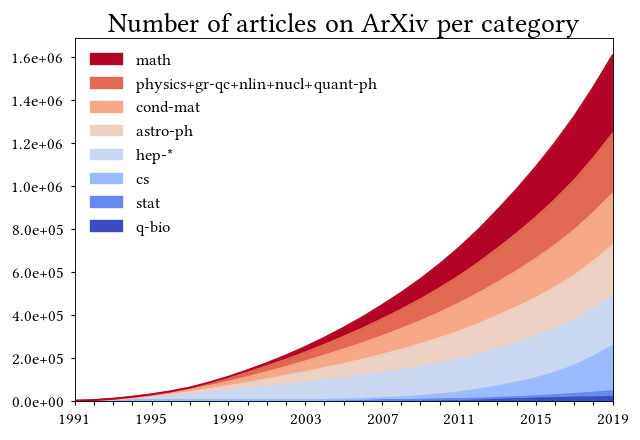

In [103]:
%matplotlib notebook

cumulative[tokeep].plot.area(cmap="coolwarm")
plt.title("Number of articles on ArXiv per category")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
plt.xticks([1991+x for x in range(2019-1991+1)], 
           [1991+x  if x%4==0 else "" for x in range(2019-1991+1)])
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::-1], labels[::-1], frameon=False)
plt.xlabel("") 
plt.tight_layout()
plt.savefig("plots/counts_arxiv.pdf")

In [104]:
# Relative counts
relative = copy.deepcopy(cumulative[tokeep])
yearsum = cumulative[tokeep].T.sum()
relativeT = relative.T
for col in relativeT.columns:
    relativeT[col] = relativeT[col] / yearsum[col]
relative = relativeT.T

<IPython.core.display.Javascript object>


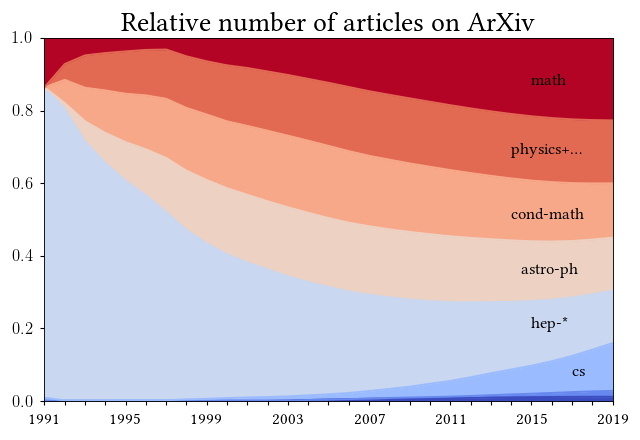

In [107]:
%matplotlib notebook

ax = relative[tokeep].plot.area(cmap="coolwarm")
plt.tight_layout()
plt.title("Relative number of articles on ArXiv")
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter())
plt.xticks([1991+x for x in range(2019-1991+1)], 
           [1991+x  if x%4==0 else "" for x in range(2019-1991+1)])
plt.gca().get_legend().remove()
plt.xlabel("")
plt.ylim(0,1)

plt.gca().text(2015, 0.87, "math", fontsize=15)
plt.gca().text(2014, 0.68, "physics+...", fontsize=15)
plt.gca().text(2014, 0.50, "cond-math", fontsize=15)
plt.gca().text(2014.5, 0.35, "astro-ph", fontsize=15)
plt.gca().text(2015, 0.20, "hep-*", fontsize=15)
plt.gca().text(2017, 0.07, "cs", fontsize=15)

plt.tight_layout()
plt.savefig("plots/relative_counts_arxiv.pdf")

<IPython.core.display.Javascript object>


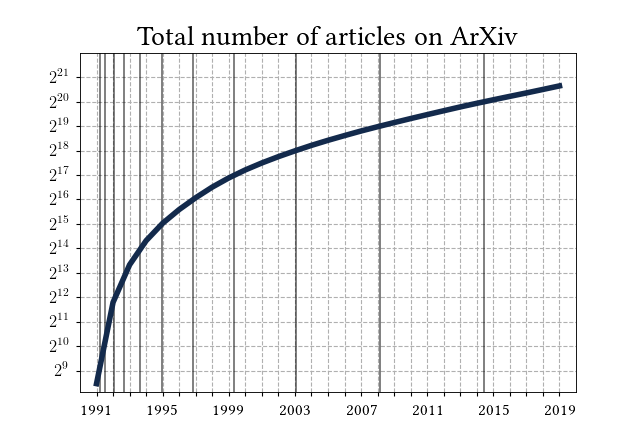

In [69]:
%matplotlib notebook

y = np.array(cumulative.T.sum())

ref = pd.Series([val for val in y])
ref.index = cumulative[tokeep].T.sum().index
plt.plot(ref, color=uiucblue, linewidth=5)

ax = plt.gca()
ax.set_yscale('log', basey=2)
plt.yticks([2**x for x in range(22)])
plt.xticks([1991+x for x in range(2019-1991+1)], 
           [1991+x  if x%4==0 else "" for x in range(2019-1991+1)])
plt.title("Total number of articles on ArXiv")

f = interpolate.interp1d(y, ref.index)
for x in range(10,21):
    plt.vlines(f(2**x), 0.5, 5*10**6, alpha=0.5)
    
plt.ylim((1.1*2**8,2**22))
plt.xlim((1990, 2020))
plt.grid(linestyle="--")

plt.tight_layout()
plt.savefig("plots/total_counts_arxiv.pdf")

<IPython.core.display.Javascript object>


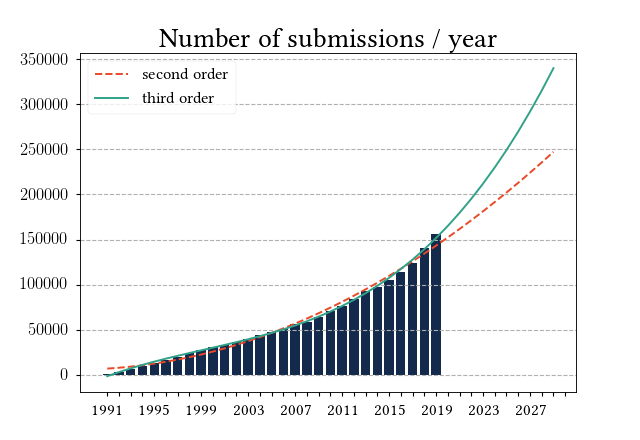

In [110]:
%matplotlib notebook

sums = cumulative.T.sum()
diffs = copy.deepcopy(sums)
diffs = diffs.sort_index()
for x in range(1992, 2020): # get the number of new submission per year
    diffs[x] = diffs[x] - sums[x-1]
plt.bar(diffs.index, diffs, color=uiucblue)

x = np.array(diffs.index)
y = np.array(diffs)

# Let's fit a second order polynom 
z = np.polyfit(x, y, 2, full=True)
fit2 = np.poly1d(z[0])
fitted = pd.Series([fit2(val) for val in list(x) + [2020 + x for x in range(10)]])
fitted.index = list(diffs.index) + [2020 + x for x in range(10)]
plt.plot(fitted, color=uiucred, linestyle="--", label="second order")

# Let's fit a third order polynom 
z = np.polyfit(x, y, 3, full=True)
fit3 = np.poly1d(z[0])
fitted = pd.Series([fit3(val) for val in list(x) + [2020 + x for x in range(10)]])
fitted.index = list(diffs.index) + [2020 + x for x in range(10)]
plt.plot(fitted, color=kitgreen, label="third order")

plt.xticks([1991+x for x in range(2030-1991+1)], 
           [1991+x  if x%4==0 else "" for x in range(2030-1991+1)])
plt.legend()

plt.title("Number of submissions / year")
plt.grid(linestyle="--", axis="y")

plt.savefig("plots/submissions_per_year_arxiv_forecast.pdf")

In [73]:
[fit2(2020 + x) for x in range(10)] # forecasted evolution of numnber of submissions

[152233.93486642838,
 161627.3021351099,
 171312.38100588322,
 181289.17147862911,
 191557.67355334759,
 202117.88722991943,
 212969.81250858307,
 224113.44938910007,
 235548.79787158966,
 247275.85795605183]

In [74]:
# Expected total number of submission by 2030
int(diffs.sum() + sum([fit2(2020 + x) for x in range(10)])) # -> 3619959

3619959

In [75]:
int(diffs.sum() + sum([fit3(2020 + x) for x in range(10)])) # -> 4087884

4087884

# Closer look -> Computer Science

In [76]:
# Let's get those for computer science
data_cs = copy.deepcopy(data[data['maincat'] == "cs"])
data_cs.loc[:,'subcat'] = [x.split(" ")[0].split(".")[1] for x in data_cs["categories"]]
data_cs['subcat'].unique()

array(['NE', 'DS', 'CE', 'IT', 'CC', 'DM', 'CR', 'NI', 'PF', 'LG', 'CY',
       'CG', 'CV', 'SE', 'OH', 'PL', 'AI', 'IR', 'GT', 'LO', 'SC', 'DC',
       'CL', 'HC', 'AR', 'DL', 'MS', 'RO', 'DB', 'GL', 'MA', 'MM', 'OS',
       'NA', 'SD', 'GR', 'FL', 'SI', 'SY', 'ET'], dtype=object)

In [77]:
# ArXiv started in 1991, and year 2020 is not over yet 
toplot = data_cs[(data_cs["year"] >= 1991) & (data_cs["year"] <= 2019)]

In [78]:
cumulative = toplot.groupby(["year", "subcat"])[["id"]].count().reset_index().pivot_table(
    index=["year"], columns=["subcat"]).fillna(0).cumsum()
cumulative.columns =  cumulative.columns.droplevel(0)
cumulative.columns.name = None

In [79]:
cumulative.T.sum()[2019] - cumulative.T.sum()[2018]

43939.0

In [80]:
tokeep = cumulative.max().sort_values(0).index # sort by decreasing

<IPython.core.display.Javascript object>


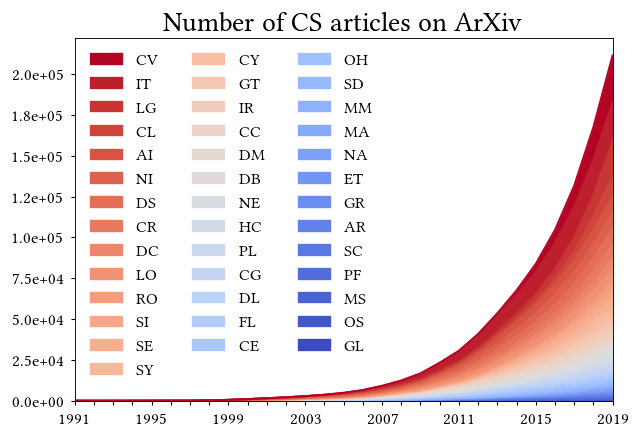

In [82]:
%matplotlib notebook

cumulative[tokeep].plot.area(cmap="coolwarm")
plt.title("Number of CS articles on ArXiv")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
plt.xticks([1991+x for x in range(2019-1991+1)], 
           [1991+x  if x%4==0 else "" for x in range(2019-1991+1)])
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::-1], labels[::-1], ncol=3, frameon=False)
plt.xlabel("")

plt.tight_layout()
plt.savefig("plots/counts_arxiv_cs.pdf")

In [81]:
# Relative counts
relative = copy.deepcopy(cumulative)
yearsum = cumulative.T.sum()
relativeT = relative.T
for col in relativeT.columns:
    relativeT[col] = relativeT[col] / yearsum[col]
relative = relativeT.T

<IPython.core.display.Javascript object>


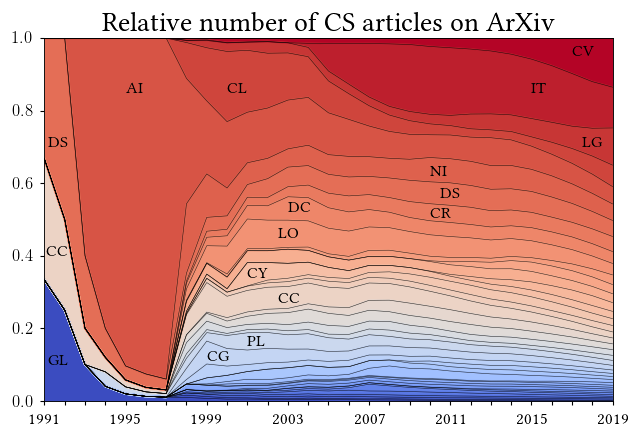

In [84]:
%matplotlib notebook

ax = relative[tokeep].plot.area(cmap="coolwarm")
relative[tokeep].plot(stacked=True, color="black", alpha=0.8, ax=ax, linewidth=0.5)
plt.title("Relative number of CS articles on ArXiv")
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter())
plt.xticks([1991+x for x in range(2019-1991+1)], 
           [1991+x  if x%4==0 else "" for x in range(2019-1991+1)])
plt.gca().get_legend().remove()
plt.xlabel("")
plt.ylim(0,1)

plt.gca().text(2017, 0.95, "CV", fontsize=15)
plt.gca().text(2015, 0.85, "IT", fontsize=15)
plt.gca().text(2017.5, 0.70, "LG", fontsize=15)
plt.gca().text(2000, 0.85, "CL", fontsize=15)
plt.gca().text(1995, 0.85, "AI", fontsize=15)
plt.gca().text(2010, 0.62, "NI", fontsize=15)
plt.gca().text(2010.5, 0.56, "DS", fontsize=15)
plt.gca().text(1991.2, 0.7, "DS", fontsize=15)
plt.gca().text(2010, 0.505, "CR", fontsize=15)
plt.gca().text(2003, 0.52, 'DC', fontsize=15)
plt.gca().text(2002.5, 0.45, 'LO', fontsize=15)
plt.gca().text(2001, 0.34, 'CY', fontsize=15)
plt.gca().text(1991.1, 0.40, 'CC', fontsize=15)
plt.gca().text(2002.5, 0.27, 'CC', fontsize=15)
plt.gca().text(2001, 0.15, 'PL', fontsize=15)
plt.gca().text(1999, 0.11, 'CG', fontsize=15)
plt.gca().text(1991.2, 0.1, 'GL', fontsize=15)

plt.tight_layout()

plt.savefig("plots/relative_counts_arxiv_cs.pdf")

In [ ]:
# How many CS articles will be have by 2030? 